In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

At the end of the past lecture, we calculated the `Standard Deviation`. However, what does this `Standard Deviation` means? What does it tell us? How do we use the `Standard Deviation`?

# Standard Deviation (Review)
1. Standard deviation (SD) measures roughly how far the data are from the average
2. SD = root mean square of deviations from average
    * What we did was the reverse of this sentence
    * Take average, deviations, squared deviations, mean (to obtain `variance`), square root (to obtain `standard deviation`)
    
      
3. SD has the same units as the data
    * We usually write `average` $\pm$ a few `SD`s

# Demo : Center and Standard Deviation
Instead of using fake dataset (recall `values` from previous lecture), we will use the **baby weights and maternal smoker** dataset, which we analyzed in the past lectures.

In [2]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


Let's take a look at the histogram of the `Maternal Age`.

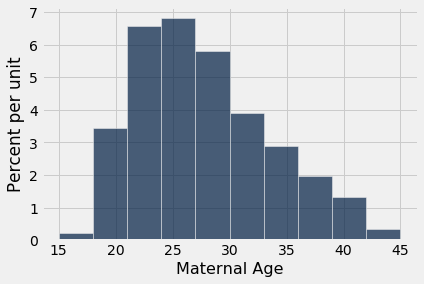

In [3]:
births.hist(2)

From the histogram above, which one is greater: `mean` or `median`?

Recall when we want to know which one is greater, we take a look at the tail since the tail has more values that are far away (extreme values). Those values affect the `mean` more. In above histogram, the tail is located on the right side of the distribution. This means the `mean` should be greater than the `median`.

We can double check if this is correct,

In [4]:
avg = np.mean(births.column(2))
avg

27.228279386712096

In [5]:
np.median(births.column(2))

26.0

Indeed the `mean` is greater than the `median`, but they are quite close to each other!

Once again, we can never find a data where the `mean` and the `median` are exactly the same, unless the data is perfectly symmetric. 

Now let's calculate the `standard deviation`,

In [6]:
sd = np.std(births.column(2))
sd

5.815360404190897

Now between `Birth Weight` and `Maternal Age`, which one has greater `standard deviation`?

The Standard Deviation is: 18.32086370220278


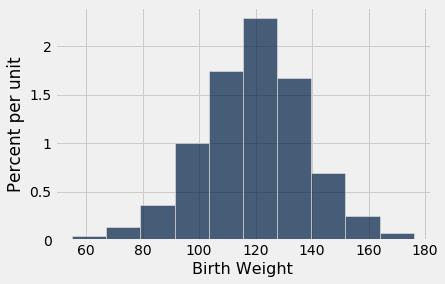

In [7]:
births.hist('Birth Weight')
print('The Standard Deviation is:', np.std(births.column('Birth Weight')) )

The Standard Deviation is: 5.815360404190897


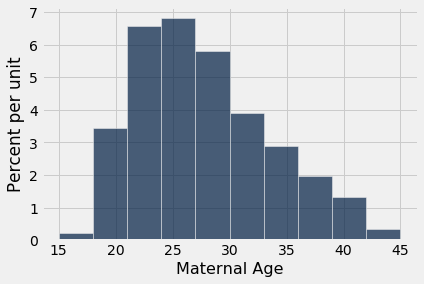

In [8]:
births.hist('Maternal Age')
print('The Standard Deviation is:', np.std(births.column('Maternal Age')) )

At a glance, the `Maternal Age` histogram has a tail on the right side and thus, it might seemed that this histogram has greater `SD`. However, if we look at the units' scale in x-axis, the `Birth Weight` scale range is greater (60 to 180). Because of greater x-axis scale, the `SD` of the `Birth Weight` histogram is greater. 

However, if the 2 histograms have roughly the same x-axis scale range, then chances are the `Maternal Age` histogram would have greater `SD.`

The `SD` measure the spread of the data. However, it turns out that we can use `SD` to infer that most of our values are within some range. 

# Chebyshev's Inequality
We can use the `SD` to state that our values are within some range. This method involes some mathematics method called **Chebyshev's Inequality**.

## How Big are Most of the Values?
#### Why Use Standard Deviation?
No matter what the shape of the distribution look like (whether it's flat, bell curve, U, etc.), most of our data are going to be in the range **average $\pm$ a few `SD`s**

If we have a data with `mean` of `10` and `SD` of 5, almost all of the data is going to be within that `5 SD` range (5 to the left or 5 to the right). 
 
#### Chebyshev's Inequality
No matter what the shape of the distribution, **the proportion of values in the range average $\pm$ z `SD`s is at least $1 - \frac{1}{z^2}$**.


The statement above might seem strange and complicated. See the table below for more explanation.

## Chebyshev's Bound

| Range | Proportion |
| --- | ---- |
| Average $\pm$ 2 SDs | at least $ 1 - \frac{1}{4}$ (75%)|
| Average $\pm$ 3 SDs | at least $ 1 - \frac{1}{9}$ (88.888...%)|
| Average $\pm$ 4 SDs | at least $ 1 - \frac{1}{16}$ (93.75%)|
| Average $\pm$ 5 SDs | at least $ 1 - \frac{1}{25}$ (96%)|

Read: If we go 2 `SD`s away, we're going to obtain 75% of the data regardless of the shape of distribution. Even if the distribution is U-shaped, the `SD` would be high enough that if we go 2 `SD`s away, 75% of the data will be there. 

Why there's no **Average $\pm$ 1 `SD`s**? Recall that **the proportion of values in the range average $\pm$ z `SD`s is at least $1 - \frac{1}{z^2}$**. 1 `SD`s means `z` is 1. If we do the calculation, it would become the following,

\begin{equation*}
1 - \frac{1}{z^2} = 1 - 1 = 0
\end{equation*}

This means the proportion of data that we're going to obtain is 0%!


Now back to our baby births dataset,

In [9]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


### In `Maternal Age` column, how many data points fall within $\pm$ 2 `SD`s?
We start with the `average` and `standard deviation`. Recall we had defined both in previous cells.

In [10]:
avg, sd

(27.228279386712096, 5.815360404190897)

Now we will try to find the proportion of rows of **Maternal Age** where the ages fall within the range `avg` $\pm$ `sd`. We can use the `where` and `are.between` for this.


In [11]:
births.where('Maternal Age', are.between(avg - 2*sd, avg + 2*sd))

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Now we can find the proportion of rows that are in the data above using `num_rows`, divided by the original table's `num_rows`.

In [12]:
births.where(2, are.between(avg - 2*sd, avg + 2*sd)).num_rows / births.num_rows

0.948892674616695

Above, we see that about 95% of the data fall within `avg` $\pm$ 2 `SD`s, which is far greater than the Chebyshev's bound of 75% (Chebyshev's table)!

In some cases, often we'll find more than 75%. But the important thing is that at least 75% is valid for any shape of distribution. 

Now let's check all the columns in the baby data! 

With the `hist` method, if we don't give any argument, Python will construct all the histograms on one plot.

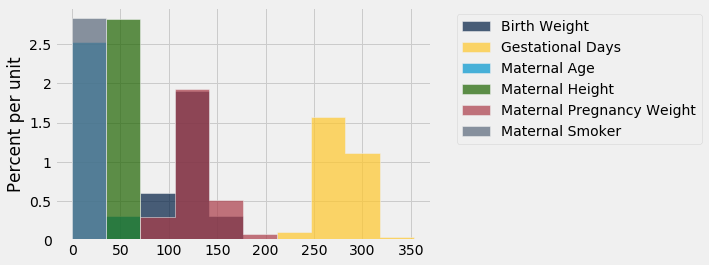

In [13]:
births.hist()

The above histogram is an overlay of all columns in our baby dataset, which is not helpful. In this case, we can add an argument `overlay = False` to separate the histograms!

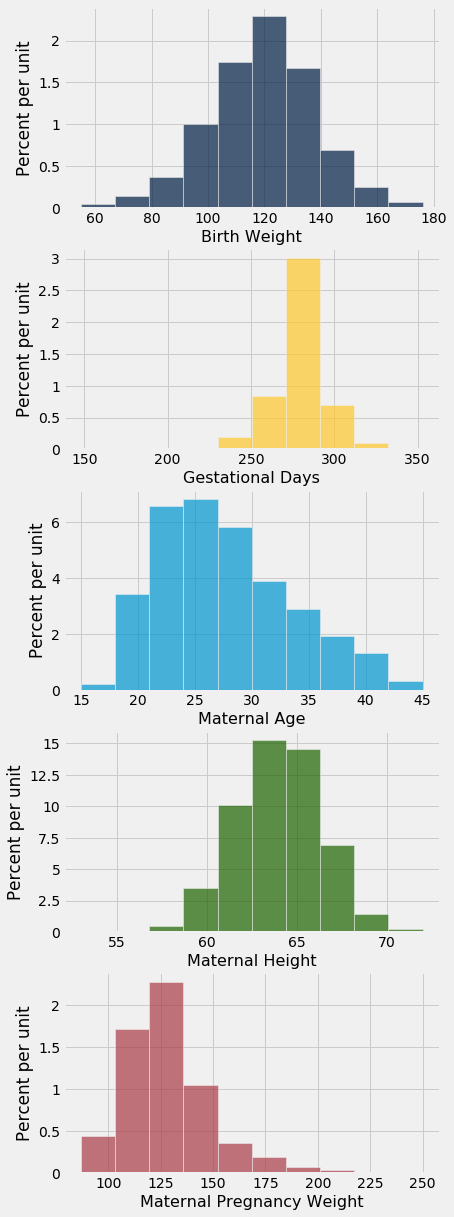

In [14]:
births.drop('Maternal Smoker').hist(overlay = False)

Below we have a code that takes each column in the baby weight table and calculates the proportion of data that are within 1 to 3 `SD`s. We can use the method `labels` to grab the column labels.

In [15]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [16]:
# Start with a for loop that loop through each column.
for i in births.labels: 
    # Take the array of values using .column method
    values = births.column(i)
    avg = np.mean(values) # Calculate the average
    sd = np.std(values) # Calculate the SD
    print('Below is the proportion of data covered for column', i)
    
    #for loop through SD between 1 to 3.
    for z in np.arange(1, 4): 
        # Filter the table so that only data within the the 'z' SD is taken
        within_sd = births.where(i, are.between(avg - z*sd, avg + z*sd))
        print('Average +/-', z, 'SD:', within_sd.num_rows / births.num_rows)
    print() #Prints an empty space between results from each column

Below is the proportion of data covered for column Birth Weight
Average +/- 1 SD: 0.692504258943782
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.995741056218058

Below is the proportion of data covered for column Gestational Days
Average +/- 1 SD: 0.7947189097103918
Average +/- 2 SD: 0.9378194207836457
Average +/- 3 SD: 0.9863713798977853

Below is the proportion of data covered for column Maternal Age
Average +/- 1 SD: 0.6746166950596252
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.9991482112436116

Below is the proportion of data covered for column Maternal Height
Average +/- 1 SD: 0.6737649063032368
Average +/- 2 SD: 0.9718909710391823
Average +/- 3 SD: 0.9965928449744463

Below is the proportion of data covered for column Maternal Pregnancy Weight
Average +/- 1 SD: 0.7385008517887564
Average +/- 2 SD: 0.9505962521294719
Average +/- 3 SD: 0.9863713798977853

Below is the proportion of data covered for column Maternal Smoker
Average +/- 1 SD: 0.6090289608177172


If we look at the data above, for `SD` of `1` and `2`, they are way above Chebyshev's bound! Notice that for `2` `SD`, we obtained around 93-97% proportion of data. However, all in all, make sure to remember that for `2` `SD`s, the proportion of data covered will be at least 75%!

# Standard Units

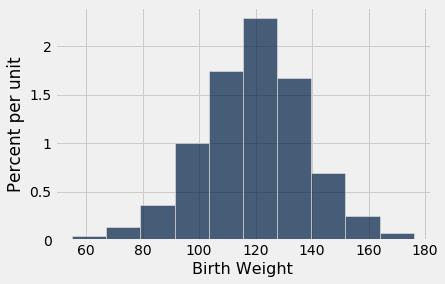

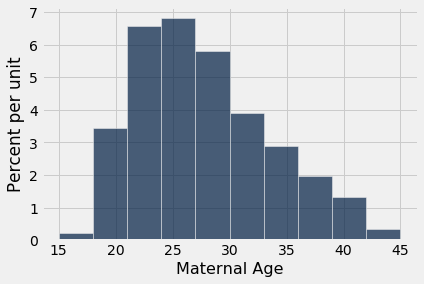

In [17]:
births.hist('Birth Weight')
births.hist('Maternal Age')

It was difficult to compare the 2 histograms above because they have different shape and units. What we can do is, we can actually change the units to `Standard Units`. `Standard units` gives us a measure that we can use. 

1. How many `SD`s above or below average?
    * Instead of saying "30 eggs away" or "30 years" from the average, here we say **"2 SDs above/below average"**. 

2. We convert our values to the `z` unit. 
\begin{equation*}
z = \frac{value - mean}{SD}
\end{equation*}

For every value in our data, subtract the value with the `mean` and divide by the `SD`. What we do here is **we convert our values to "how many `SD`s away from the average"**.

Suppose the `mean` is `10` and `SD` is `2`. If the value is `12`, then we'll obtain,
\begin{equation*}
z = \frac{12 - 10}{2} = 1
\end{equation*}
Then we say "`12` is `1` `SD` away from the `mean`".

If the value is `13` and do the same calculation,
\begin{equation*}
z = \frac{13 - 10}{2} = 1.5
\end{equation*}
Then we say "`13` is `1.5` `SD` away from the `mean`".

Thus, we can define this `z` as "how many `SD`s away from the average we are".
* Negative z : the value is below average
* Positive z : the value is above average
* z = 0      : the value is equal to average

When we convert the data's units to standard units, we are doing the following:
1. Shift the histogram so that it's centered at 0
2. Adjust the spread of the distribution so that the `SD` is 1

By Chebyshev's inequality, no matter what distribution we have, most values of `z` are between `-5` to `5`. This is equivalent to saying, "most of our values are within 5 `SD`s of the average". 

## Demo
Going back to our `births` table,

In [18]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


Let's take the **Maternal Age** column, convert the units to standard units and plot the distribution! Start with double checking that the `avg` and `sd` correspond to those of `Maternal Age`.

In [19]:
values = births.column('Maternal Age')
avg = np.mean(values)
sd = np.std(values)
avg, sd

(27.228279386712096, 5.815360404190897)

Now let's calculate the values in standard units. Call these `z`. 

In [20]:
# Calculate z for every value
z = (values - avg) / sd
z

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

Then let's create a table that contains the original value and the converted value!

In [21]:
t = Table().with_column(
'Values', values,
'z', z)
t

Values,z
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


Now let's see the histograms of the data above and compare them.

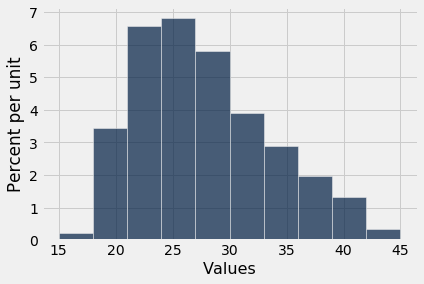

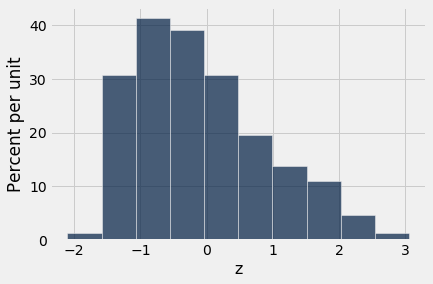

In [22]:
t.hist('Values')
t.hist('z')

Notice that the histogram shape of the `z` looks very similar to that of the original data!

This is convenient because when we convert to standard units, the distribution will have `average` of `0` and `SD` of `1`. Suppose we do the same thing to the **Birth Weight** column, even though the values are around 120, 113, 128, etc., when we convert it to standard units, the distribution will also have `average` of `0` and `SD` of `1`. This lets us compare easily 2 distributions to see which one has greater `SD`. 

It is encouraged to try this on our own. Try and see based on standard units, can we work backwards? Can we draw some conclusion about our data if converted to standard units?

# The Normal Distribution
In the class, we've gone through examples of data manipulation and simulation. We have seen lots of histograms that look like a bell curve. It might seem strange that we see bell curve histograms so often. Turns out this shape has a name, **The Normal Distribution**.

## The SD and the Histogram

Usually, it's difficult to estimate the `SD` by just looking at a histogram. This is especially true if our histogram has an odd shape (e.g. U-shaped). If the histogram has a bell shape, it is easy to estimate the `SD`.

## Demo
Below is a histogram of the **Maternal Height**. 

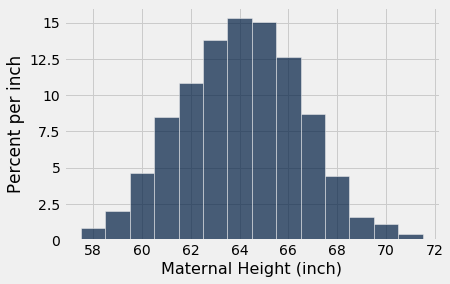

In [23]:
births.hist("Maternal Height", bins = np.arange(57.5, 72, 1), unit = 'inch')

We can see above that the histogram of `Maternal Height` has a bell shape. At a glance, we can estimate that the `SD` is where the inflection points of the curve is located.

By inflection points, imagine an upward curve from 58 inch to 64 inch.

The curves rises and then reaches a plateau at 64 before it falls down. During the increase, there should be a point where the slope started decreasing (approximately around 61). 
<img src = 'inflection.jpg' width = 400/>
The point pointed by the blue arrow is estimated to be the inflection point, which is where the `SD` is. The inflection point on the other side should be around the same height but on the right side (approximately around `67`).

Since the middle point is `64` and the `SD` is roughly `61` and `67`, we estimated that the `SD` is `3`.

We can double check by computing the `SD` using `np.std`,

In [24]:
np.std(births.column('Maternal Height'))

2.5250254409674375

Close enough!

We call the shape above **roughly normal**. This is because a normal distribution has a theoretical shape that look like the following:

Below, we use `np.random` and take samples according to a precise **mathematical normal distribution**. The **theoretical normal distribution** look like the following,

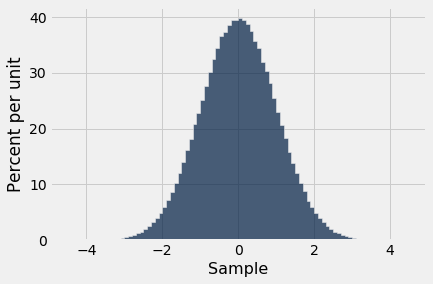

In [25]:
samples = [] #An empty list that will contain random samples
for i in np.arange(1e6): # A number from 0 to 1 million
    samples.append(np.random.normal())
Table().with_column('Sample', samples).hist(bins=np.arange(-4.5, 4.6, .1))

In practice, we get histogram with shapes that look close enough but not exactly the same as the **normal distribution** above. If we obtain a distribution that roughly close enough to the shape above, we call our distribution **roughly normal**. 

## The `SD` and Bell-Shaped Curves
It turns out that if a histogram is bell shaped and the `average` is at the center of the histogram, then the `SD` is the distance between the points of inflection on either side.

# Normal Proportions

## How Big are Most of the Values?
Recall Chebyshev's inequality, that **no matter what the shape of the distribution, most the data are in the range "average $\pm$ a few `SD`s"**.

However if our data is **normal** (if the histogram is **bell-shaped**), then we can tighten the bounds and we can say, **"almost all of the data are in the range average $\pm$ 3 SDs"**.

Turns out that if given a theoretical normal distribution, we try to find out how many values are within 1, 2, 3 `SD`s, we will obtain the following,

## Bounds and Normal Approximations

| Percent in Range | All Distributions | Normal Distribution |
| --- | ---- | ----|
| Average $\pm$ 1 SDs | at least 0% | about 68%|
| Average $\pm$ 2 SDs | at least 75% | about 95%|
| Average $\pm$ 3 SDs | at least 88.888...%| about 99.73%|

The middle column is Chebyshev's Inequality. 

If our data is **perfectly normal**, then we can say about 68% of our data is within 1 `SD`.

Now recall the histograms of every column of the table `births`

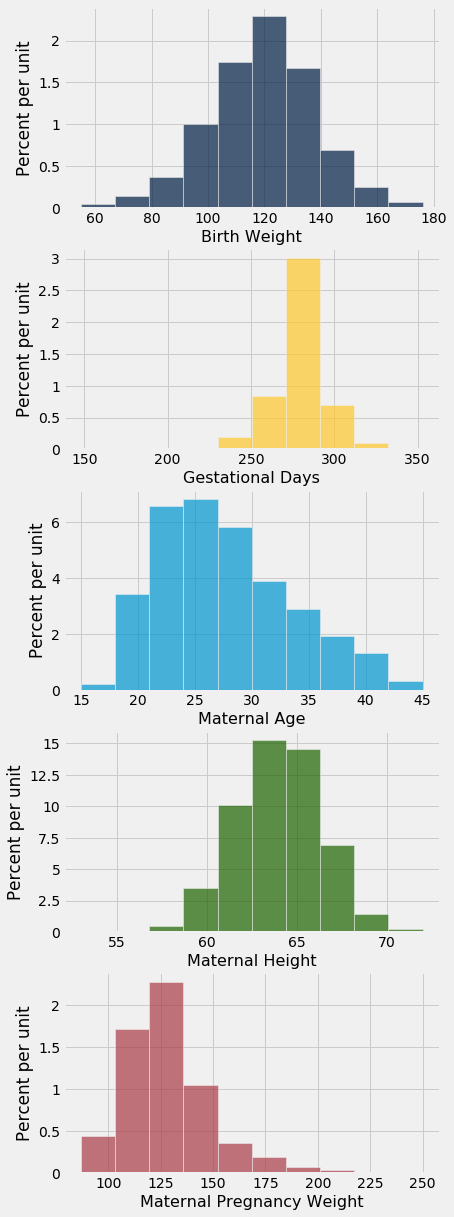

In [26]:
births.drop('Maternal Smoker').hist(overlay = False)

In [27]:
# Start with a for loop that loop through each column.
for i in births.labels: 
    # Take the array of values using .column method
    values = births.column(i)
    avg = np.mean(values) # Calculate the average
    sd = np.std(values) # Calculate the SD
    print('Below is the proportion of data covered for column', i)
    
    #for loop through SD between 1 to 3.
    for z in np.arange(1, 4): 
        # Filter the table so that only data within the the 'z' SD is taken
        within_sd = births.where(i, are.between(avg - z*sd, avg + z*sd))
        print('Average +/-', z, 'SD:', within_sd.num_rows / births.num_rows)
    print() #Prints an empty space between results from each column

Below is the proportion of data covered for column Birth Weight
Average +/- 1 SD: 0.692504258943782
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.995741056218058

Below is the proportion of data covered for column Gestational Days
Average +/- 1 SD: 0.7947189097103918
Average +/- 2 SD: 0.9378194207836457
Average +/- 3 SD: 0.9863713798977853

Below is the proportion of data covered for column Maternal Age
Average +/- 1 SD: 0.6746166950596252
Average +/- 2 SD: 0.948892674616695
Average +/- 3 SD: 0.9991482112436116

Below is the proportion of data covered for column Maternal Height
Average +/- 1 SD: 0.6737649063032368
Average +/- 2 SD: 0.9718909710391823
Average +/- 3 SD: 0.9965928449744463

Below is the proportion of data covered for column Maternal Pregnancy Weight
Average +/- 1 SD: 0.7385008517887564
Average +/- 2 SD: 0.9505962521294719
Average +/- 3 SD: 0.9863713798977853

Below is the proportion of data covered for column Maternal Smoker
Average +/- 1 SD: 0.6090289608177172


If we see the result above, see that for 2 `SD`s, the values are around 95%. When the distribution is not perfect bell-shaped, we won't obtain exactly 95%.

Often, our real data won't be perfectly bell-shaped. Knowing the normal distribution and the bounds help us estimating the data within a few `SD`s. 

The **normal** bounds has better bound than Chebyshev's Inequality, but once again they are not precise. We can't tell if it's always going to be lower or greater than 95%. 

## Central Limit Theorem
If the sample is **large** and **drawn at random with replacement**, then **regardless of the distribution of the population**, the probability distribution of the sample `sum` (or the sample `average`) is roughly bell-shaped.

If we look at the histogram of `Maternal Age` once again,

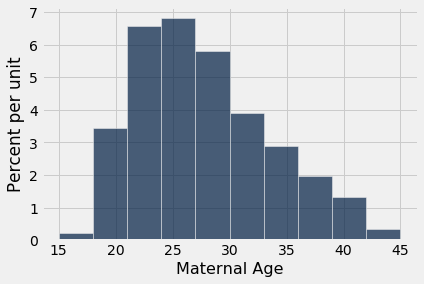

In [28]:
births.hist('Maternal Age')

This is not quite bell shaped. Let's also take the average of the data above,

In [29]:
np.mean(births.column('Maternal Age'))

27.228279386712096

If we were to sample the data above with replacement and take the average,

In [30]:
np.mean(births.sample().column('Maternal Age'))

27.344974446337307

If our sample is large enough, we expect the sample `mean` to be close to the population `mean`. 

Now looking back at the distribution of `Maternal Age`, it has a long right tail. If we take a bunch of samples, compute the `mean`s and plot the `mean`s, 

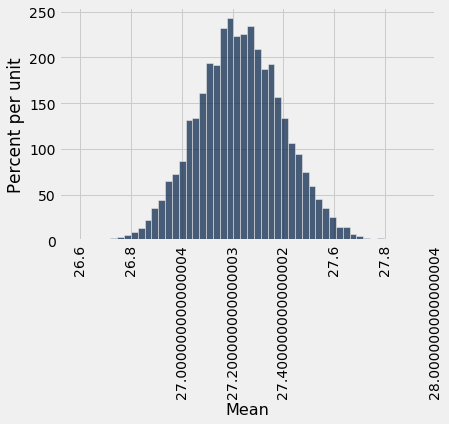

In [31]:
mean = [] # Empty list that will contain the computed means
repetitions = 10000
for i in np.arange(repetitions):
    mean.append(np.mean(births.sample().column('Maternal Age')))
    
Table().with_column('Mean', mean).hist(bins = 50)

Even though the population distribution of the `Maternal Age` does not have a bell shape, when we grab samples and take the `mean`s of every sample and plot the histogram of the `mean`s, the histogram looks normal! This is a result from statistics called **Central Limit Theorem**, which basically says:

"As the sample size increases, the distribution is going to look more **normal**"

When we did the simulation above, we used the same amount of sample as the `births` table, `1174`

In [32]:
births.num_rows

1174

What if we repeat the simulation with a sample size of `10`?

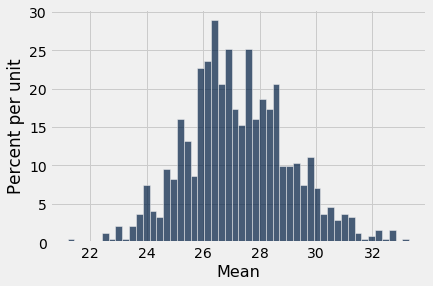

In [33]:
mean = [] # Empty list that will contain the computed means
repetitions = 1000
for i in np.arange(repetitions):
    mean.append(np.mean(births.sample(10).column('Maternal Age'))) # sample size 10
    
Table().with_column('Mean', mean).hist(bins = 50)

If we redo the histogram plotting with varying `sample_size`,

In [46]:
def plot_mean(sample_size):
    mean = []
    repetitions = 1000
    for i in np.arange(repetitions):
        mean.append(np.mean(births.sample(sample_size).column('Maternal Age')))
    
    Table().with_column('Mean', mean).hist(bins = 50)

In [47]:
_ = interact(plot_mean, sample_size = np.arange(10, 1100, 100))

interactive(children=(Dropdown(description='sample_size', options=(10, 110, 210, 310, 410, 510, 610, 710, 810,…

Notice that at low sample size, the distribution looks spiky, doesn't exactly look like a normal distribution. As we increase the sample size, the distribution looks more **normal**. This is **Central Limit Theorem**.